In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [3]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Final_Game_df.xlsx')



In [4]:
df.head()

Date  Year          Home Team  Home Team Ranking_x  Away Team  \
0 2021-11-27  2021             Auburn                   99    Alabama   
1 2021-11-27  2021                LSU                   99  Texas A&M   
2 2021-11-26  2021           Arkansas                   25   Missouri   
3 2021-11-25  2021  Mississippi State                   99   Ole Miss   
4 2021-11-25  2021  Mississippi State                   99   Ole Miss   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
0                    3                19.5               -19.5     55.5   
1                   15                 6.5                -6.5     27.0   
2                   99               -14.5                14.5     63.0   
3                    9                -2.0                 2.0     65.0   
4                    9                -2.0                 2.0     65.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
0              22              24                      225.0   
1              27              24                      167.0   
2              34              17                      120.0   
3              21              31                      151.0   
4              21              31                      174.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
0                           45.0                           55.0   
1                           33.4                           48.0   
2                           24.0                           37.0   
3                           30.2                           48.0   
4                           34.8                           54.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
0                           31.0                      118.0   
1                           19.0                       88.0   
2                            6.0                       71.0   
3                           20.0                       82.0   
4                           20.0                       72.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
0                      39.333333                           49.0   
1                      29.333333                           35.0   
2                      23.666667                           37.0   
3                      27.333333                           31.0   
4                      24.000000                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
0                           31.0             49.0   
1                           19.0             19.0   
2                            6.0              6.0   
3                           20.0             31.0   
4                           20.0             20.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
0                            1550.0                                 310.0   
1                            1086.0                                 217.2   
2                            1018.0                                 203.6   
3                            1218.0                                 243.6   
4                            1396.0                                 279.2   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
0                                 385.0                                 208.0   
1                                 281.0                                 148.0   
2                                 294.0                                  78.0   
3                                 289.0                                 213.0   
4                                 412.0                                 213.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
0                             957.0                            319.000000   
1                             666.0                            222.000000   
2                             590.0             

In [5]:
df.shape

(997, 1593)

In [8]:
df=df.dropna()

In [9]:
df.shape

(892, 1593)

In [40]:
df[['Home Team','Away Team','Year']].groupby(['Year','Home Team','Away Team']).count()

Empty DataFrame
Columns: []
Index: [(2005, Alabama, LSU), (2005, Alabama, Tennessee), (2005, Arkansas, Mississippi State), (2005, Arkansas, South Carolina), (2005, Auburn, Alabama), (2005, Auburn, Ole Miss), (2005, Auburn, South Carolina), (2005, Florida, Georgia), (2005, Florida, Mississippi State), (2005, Georgia, Auburn), (2005, Georgia, Kentucky), (2005, LSU, Arkansas), (2005, LSU, Auburn), (2005, LSU, Florida), (2005, Mississippi State, Alabama), (2005, Mississippi State, Ole Miss), (2005, Ole Miss, Arkansas), (2005, Ole Miss, LSU), (2005, South Carolina, Florida), (2005, Tennessee, Georgia), (2005, Tennessee, South Carolina), (2005, Vanderbilt, Kentucky), (2006, Alabama, Auburn), (2006, Alabama, Mississippi State), (2006, Alabama, Ole Miss), (2006, Arkansas, Alabama), (2006, Arkansas, LSU), (2006, Arkansas, Ole Miss), (2006, Arkansas, Tennessee), (2006, Auburn, Arkansas), (2006, Auburn, Florida), (2006, Auburn, Georgia), (2006, Auburn, LSU), (2006, Florida, Alabama), (2006, Florida, Arkansas), (2006, Florida, Kentucky), (2006, Florida, LSU), (2006, Florida, South Carolina), (2006, Georgia, Mississippi State), (2006, Georgia, Tennessee), (2006, Georgia, Vanderbilt), (2006, Kentucky, Georgia), (2006, Kentucky, South Carolina), (2006, Kentucky, Vanderbilt), (2006, LSU, Alabama), (2006, LSU, Kentucky), (2006, LSU, Mississippi State), (2006, LSU, Ole Miss), (2006, Mississippi State, Arkansas), (2006, Mississippi State, Auburn), (2006, Mississippi State, Kentucky), (2006, Mississippi State, South Carolina), (2006, Ole Miss, Auburn), (2006, Ole Miss, Georgia), (2006, Ole Miss, Mississippi State), (2006, Ole Miss, Vanderbilt), (2006, South Carolina, Arkansas), (2006, South Carolina, Auburn), (2006, South Carolina, Georgia), (2006, South Carolina, Tennessee), (2006, Tennessee, Alabama), (2006, Tennessee, Florida), (2006, Tennessee, Kentucky), (2006, Tennessee, LSU), (2006, Vanderbilt, Arkansas), (2006, Vanderbilt, Florida), (2006, Vanderbilt, South Carolina), (2006, Vanderbilt, Tennessee), (2007, Alabama, Arkansas), (2007, Alabama, Georgia), (2007, Alabama, LSU), (2007, Arkansas, Auburn), (2007, Arkansas, Kentucky), (2007, Arkansas, Mississippi State), (2007, Arkansas, South Carolina), (2007, Auburn, Alabama), (2007, Auburn, Mississippi State), (2007, Auburn, Ole Miss), (2007, Auburn, Vanderbilt), (2007, Florida, Auburn), (2007, Florida, Georgia), (2007, Florida, Tennessee), (2007, Florida, Vanderbilt), (2007, Georgia, Auburn), (2007, Georgia, Kentucky), (2007, Georgia, Ole Miss), (2007, Georgia, South Carolina), (2007, Kentucky, Florida), (2007, Kentucky, LSU), (2007, Kentucky, Mississippi State), (2007, Kentucky, Tennessee), (2007, LSU, Arkansas), (2007, LSU, Auburn), (2007, LSU, Florida), (2007, LSU, South Carolina), (2007, LSU, Tennessee), (2007, Mississippi State, Alabama), (2007, Mississippi State, LSU), (2007, Mississippi State, Ole Miss), (2007, Mississippi State, Tennessee), ...]

# Percentiles example

In [10]:

percentiles = np.array([2.5,25,50,75,97.5])
a = np.percentile(df['Rolling 5 Past H&A Score_Home_Team'],percentiles)


print(a)

[ 54.   101.75 129.   159.25 222.  ]


In [15]:
b = np.percentile(df['Rolling 5 Past H&A Score Avg_Away_Team'],percentiles)


print(b)

[10.8   20.15  24.8   30.2   43.705]


In [18]:
c = np.percentile(df['Past Home Score'],percentiles)


print(c)

[ 3.    17.    27.    37.    55.525]


In [19]:
c = np.percentile(df['Past Away Score'],percentiles)


print(c)

[ 0. 14. 23. 33. 52.]


# Boxplot example

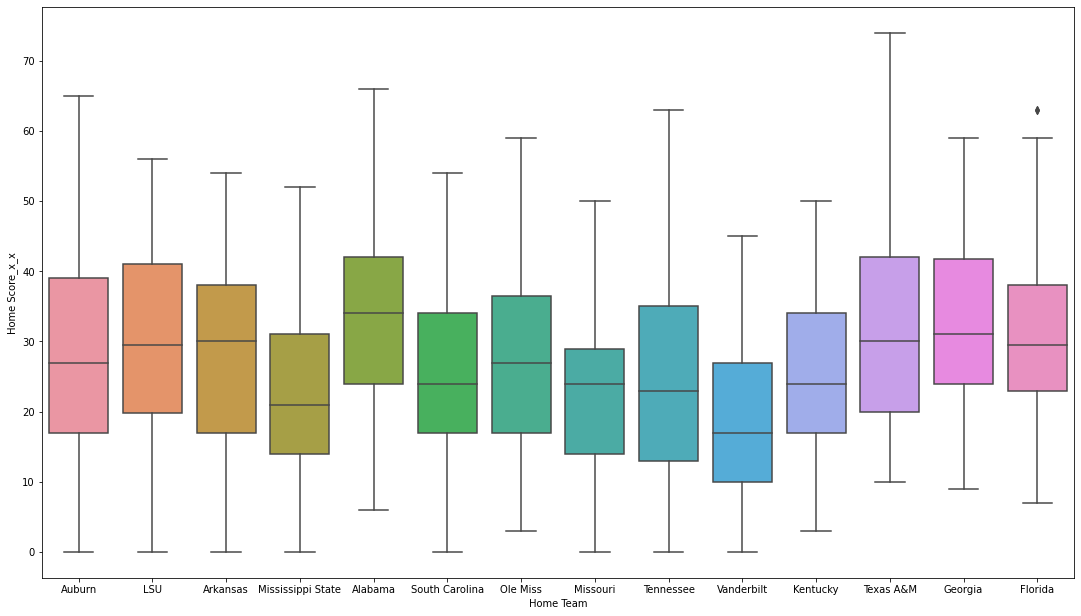

In [41]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='Home Team',y='Past Home Score',data=df)

# Label the axes

plt.xlabel('Home Team')
plt.ylabel('Home Score_x_x')

# Show the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

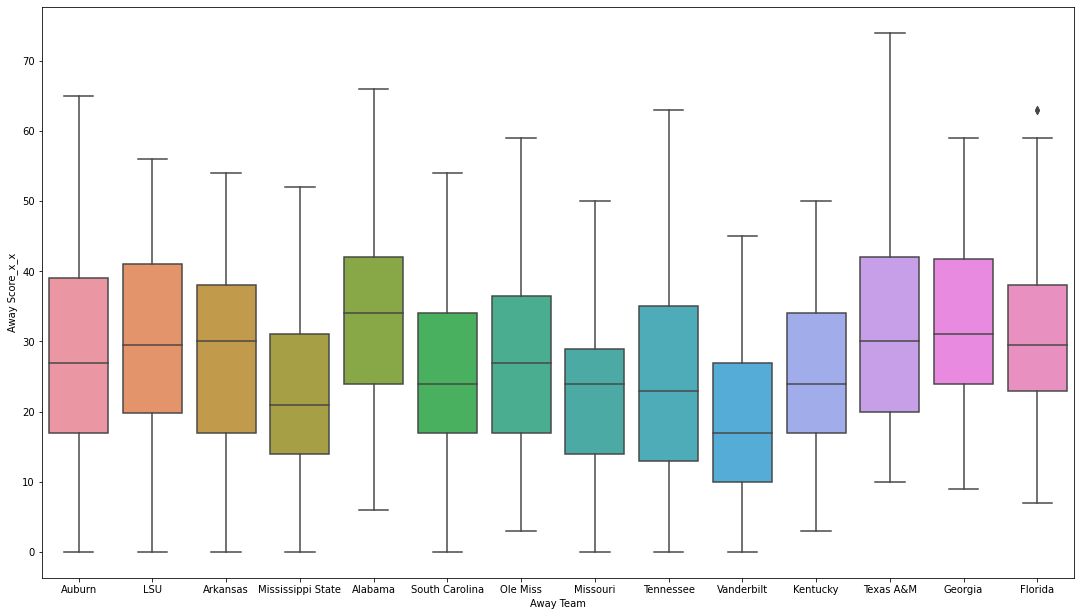

In [42]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='Home Team',y='Past Home Score',data=df)

# Label the axes

plt.xlabel('Away Team')
plt.ylabel('Away Score_x_x')

# Show the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [43]:
df['Home Score_x_x'].mean()

27.57286995515695

In [44]:
df['Away Score_x_x'].mean()

24.586322869955158

(array([ 59., 110., 167., 176., 129., 138.,  77.,  29.,   6.,   1.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <BarContainer object of 10 artists>)

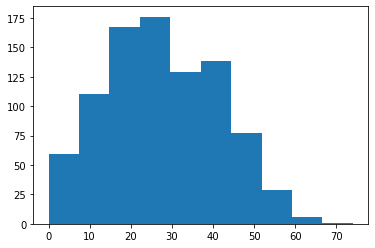

In [46]:
plt.hist(df['Home Score_x_x'])

(array([106., 154., 169., 154., 122.,  85.,  46.,  28.,  25.,   3.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

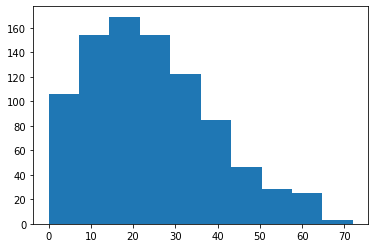

In [47]:
plt.hist(df['Away Score_x_x'])

In [54]:
H_wins=np.sum(df['Home Score_x_x'] > df['Away Score_x_x'])
H_wins

496

In [55]:
A_wins=np.sum(df['Away Score_x_x'] > df['Home Score_x_x'])
A_wins

396

In [57]:
Total_games=H_wins + A_wins

In [58]:
H_wins/Total_games

0.5560538116591929

In [59]:
A_wins/Total_games

0.4439461883408072

# Permutation test

In [62]:
stats.normaltest(df['Home Score_x_x'])

NormaltestResult(statistic=18.16262403001535, pvalue=0.00011377223860661765)

In [63]:
stats.normaltest(df['Away Score_x_x'])

NormaltestResult(statistic=49.703433908809956, pvalue=1.6107808614488483e-11)

In [65]:
#We can conclude that the distributions are not normal as we have a pvalue less than .05 for both home and away score distributions

In [79]:
H_df=df
H_df['Score'] = df['Home Score_x_x']
H_df['Home_Away_df'] = 'Home_df'
H_df=H_df[['Score','Home_Away_df']]


In [81]:
A_df=df
A_df['Score']=df['Away Score_x_x']
A_df['Home_Away_df']= 'Away_df'
A_df=A_df[['Score','Home_Away_df']]

In [80]:
H_df.head()

,Score,Home_Away_df
0,22,Home_df
1,27,Home_df
2,34,Home_df
3,21,Home_df
4,21,Home_df


In [82]:
A_df.head()

,Score,Home_Away_df
0,24,Away_df
1,24,Away_df
2,17,Away_df
3,31,Away_df
4,31,Away_df


In [91]:
H_A_df= pd.concat([H_df,A_df])

In [92]:
H_A_df.sample(10)

,Score,Home_Away_df
130,34,Home_df
149,41,Home_df
575,7,Away_df
527,45,Home_df
372,16,Home_df
270,23,Home_df
346,39,Home_df
465,20,Away_df
675,55,Away_df
132,17,Home_df


In [94]:
H_A_df.shape

(1784, 2)

In [95]:
H_A_df['Permutation1'] = np.random.permutation(H_A_df['Score'])

In [96]:
H_A_df.groupby(by='Home_Away_df')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Home_Away_df,,,,,,,,
Away_df,892.0,26.242152,14.149106,0.0,16.0,24.0,36.0,74.0
Home_df,892.0,25.917040,13.858588,0.0,16.0,24.0,35.0,66.0


In [97]:
H_A_df.groupby(by='Home_Away_df')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Home_Away_df,,,,,,,,
Away_df,892.0,24.586323,14.401114,0.0,14.0,23.0,34.0,72.0
Home_df,892.0,27.572870,13.433306,0.0,17.0,27.0,38.0,74.0


In [106]:
difference = list()

In [107]:
for i in range(100000):
    permutation = np.random.permutation(H_A_df['Score'])
    difference.append(np.mean(permutation[H_A_df['Home_Away_df']=='Home_df']) - np.mean(permutation[H_A_df['Home_Away_df']=='Away_df']))

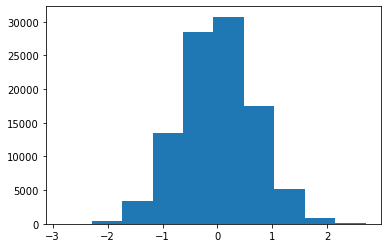

In [108]:
histo = plt.hist(difference)

In [109]:
obs_difference = np.mean(H_df['Score']) - np.mean(A_df['Score'])
obs_difference

2.986547085201792

In [110]:
obs_difference = abs(obs_difference)

In [111]:
obs_difference

2.986547085201792

In [112]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

0
0
